Data Exploration

In [6]:
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Adjust this to the directory where you want to extract the dataset
Extract_path = "datasets/housing"
Housing_path = "housing.tgz"  # Path to the uploaded tgz file

def fetch_housing_data(housing_path=Housing_path, extract_path=Extract_path):
    os.makedirs(extract_path, exist_ok=True)
    housing_tgz = tarfile.open(housing_path)
    housing_tgz.extractall(path=extract_path)
    housing_tgz.close()

fetch_housing_data()

housing_csv_path = os.path.join(Extract_path, "housing.csv")
housing = pd.read_csv(housing_csv_path)
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


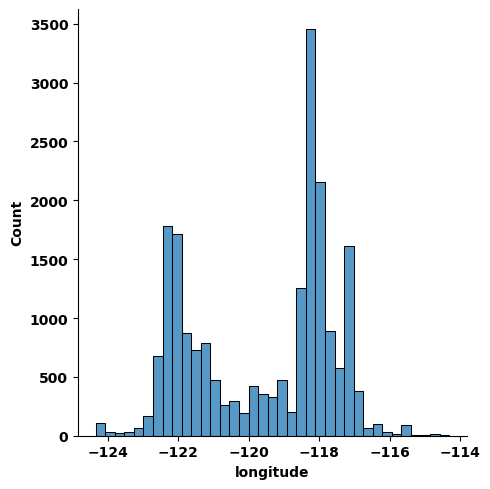

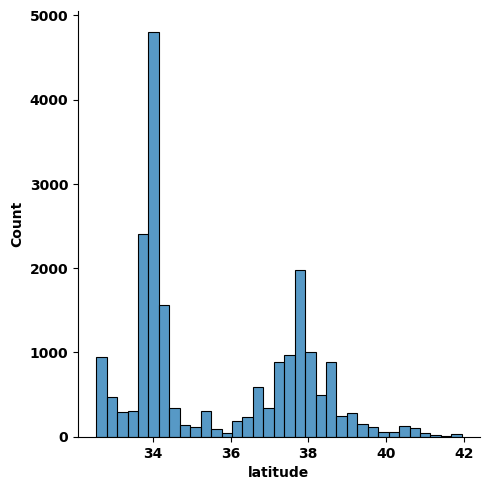

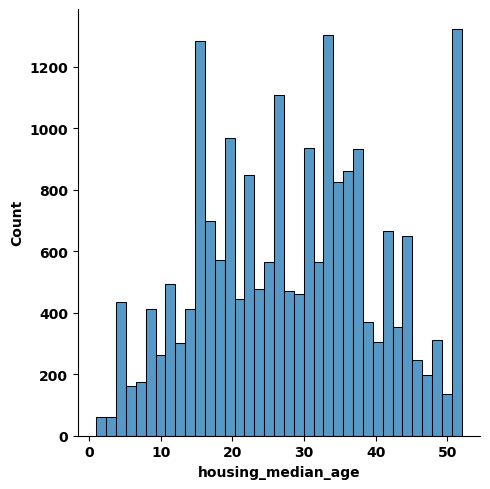

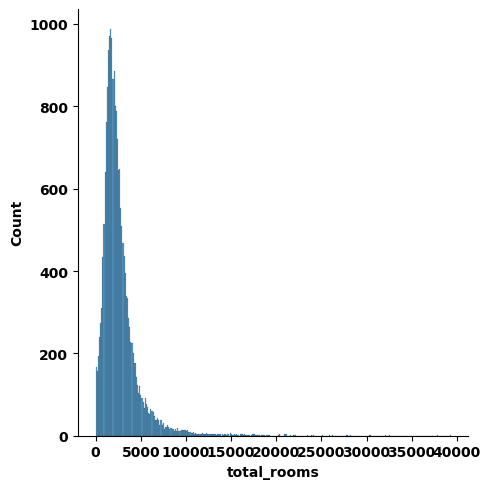

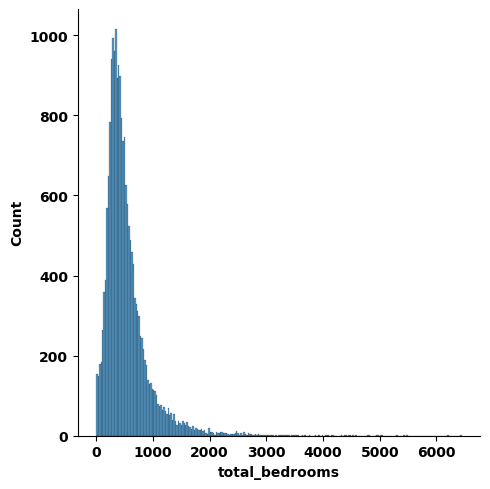

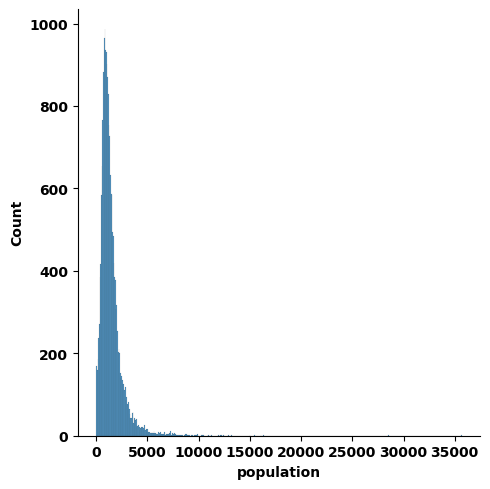

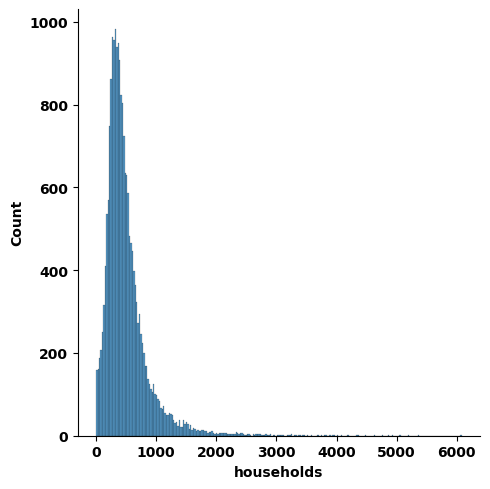

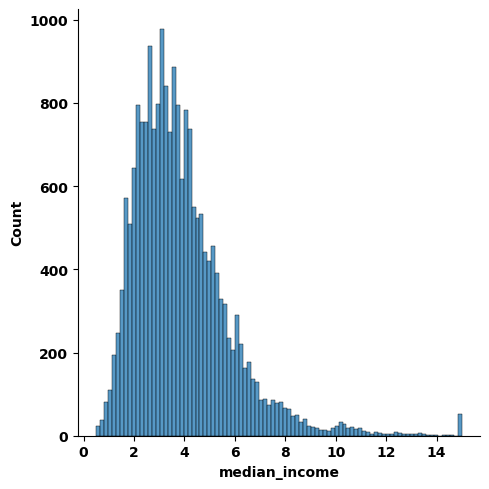

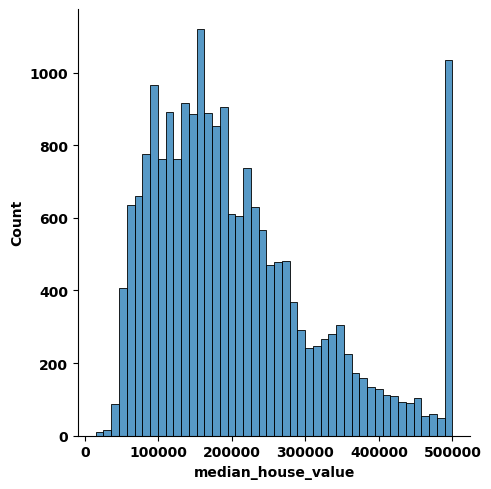

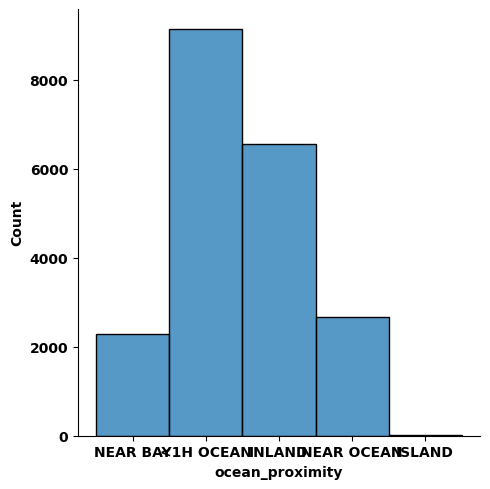

In [11]:
import seaborn as sns
for i in (housing.columns):    
    sns.displot(housing[i])


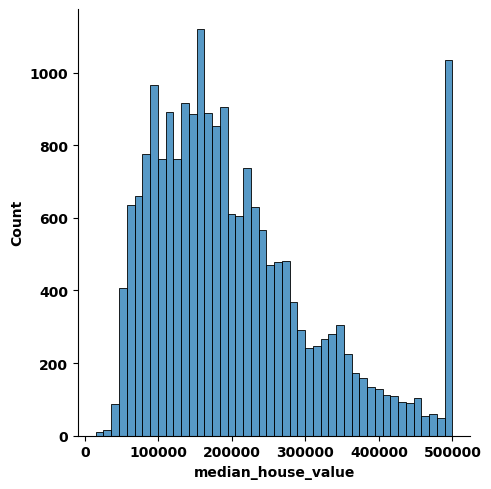

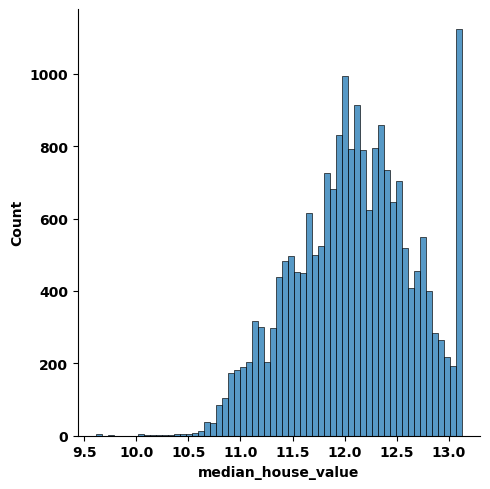

In [12]:
import numpy as np
y=np.log1p(housing['median_house_value'])
sns.displot(housing['median_house_value'])
sns.displot(y)

<Axes: >

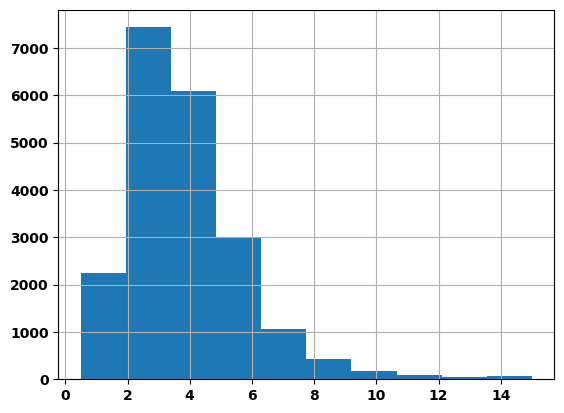

In [13]:
housing['median_income'].hist()


In [14]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [15]:
housing['income_cat']=pd.cut(housing['median_income'],
                            bins=[0.,1.5,3.0,4.5,6,np.inf],
                            labels=[1,2,3,4,5])

In [16]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_22956\2691285575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<Axes: >

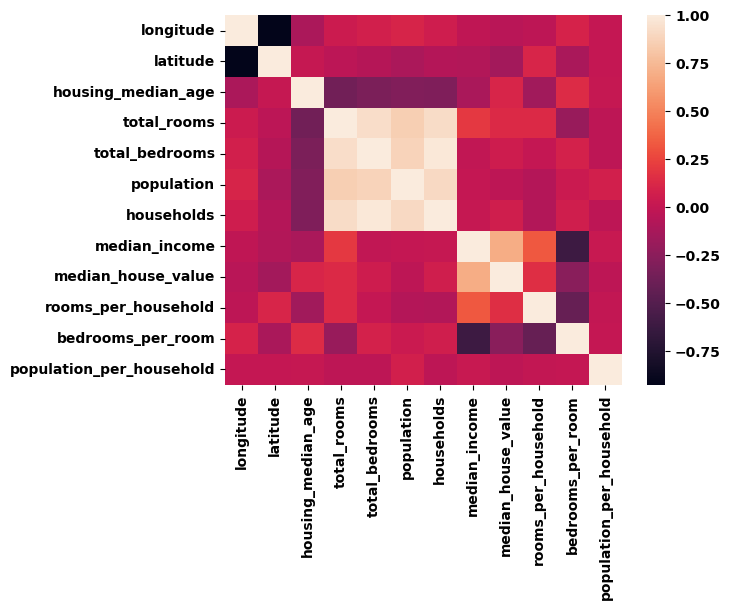

In [17]:
sns.heatmap(corr_matrix)
            # xticklabels=corr_matrix.columns.values,
            # yticklabels=corr_matrix.columns.values)

Saving figure scatter_matrix_plot


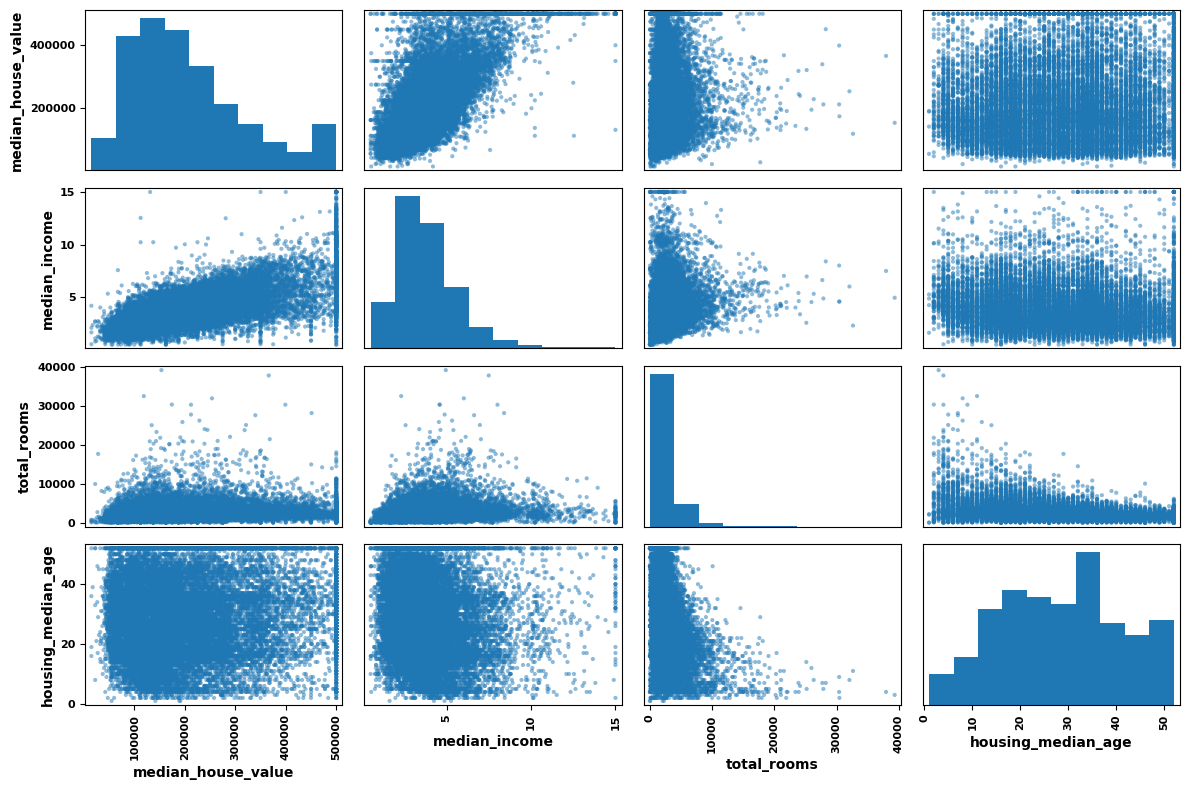

In [18]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value",'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

Data prepration

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    


<Axes: xlabel='longitude', ylabel='latitude'>

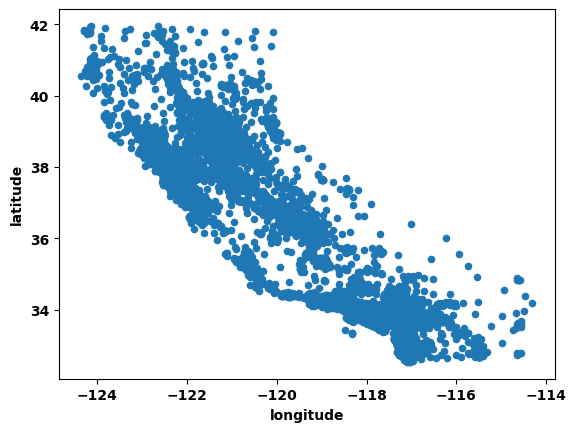

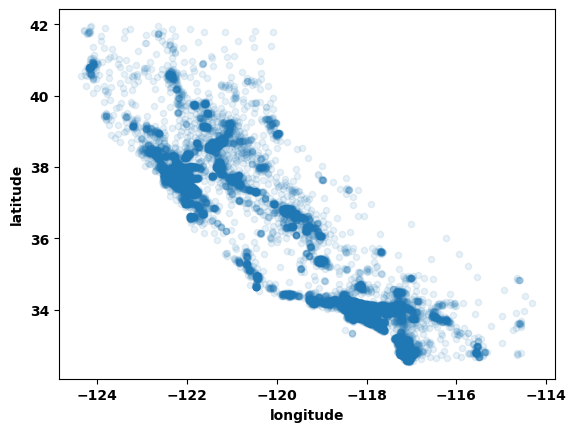

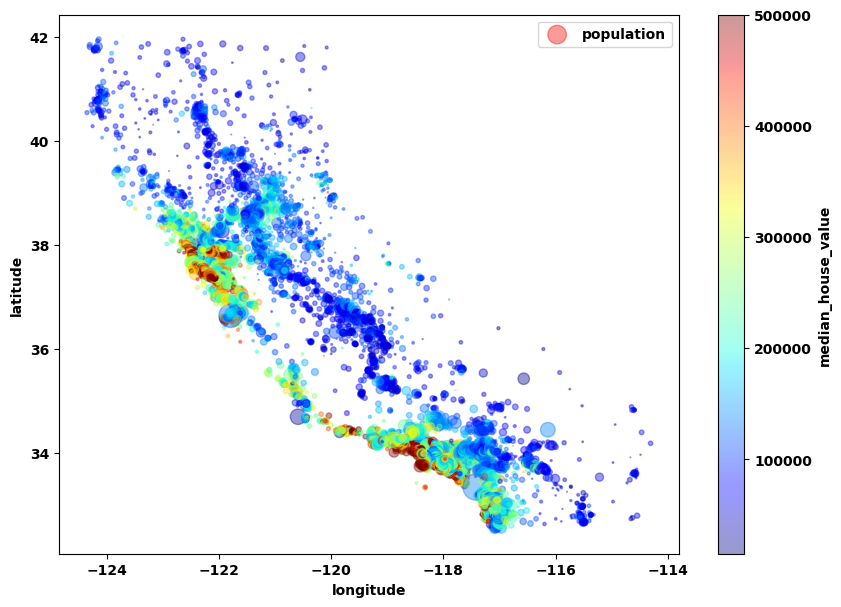

In [20]:
housing.plot(kind='scatter',x='longitude',y='latitude')
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100, label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,
            sharex=False)


In [21]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255,2
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727,3


In [22]:
median=housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace=True)
median=housing['bedrooms_per_room'].median()
sample_incomplete_rows['bedrooms_per_room'].fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,0.203162,2.614679,3
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,0.203162,2.826255,2
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,0.203162,2.938727,2
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,0.203162,2.630137,4
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,0.203162,2.403727,3


In [23]:
housing_num=housing.drop('ocean_proximity',axis=1)
housing_labels = housing["median_house_value"].copy()


In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00,
        3.00000000e+00])

In [26]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])


[[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [28]:
housing_cat_encoded_series = pd.Series(housing_cat_encoded.flatten())
print(housing_cat_encoded_series.value_counts())

0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
dtype: int64


In [29]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [30]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")
]


In [31]:
def add_extra_feature(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

from sklearn.preprocessing import FunctionTransformer
attr_adder = FunctionTransformer(add_extra_feature, validate=False, kw_args={'add_bedrooms_per_room': False})
housing_extra_attribute = attr_adder.fit_transform(housing.values)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',FunctionTransformer(add_extra_feature,validate=False)),
    ('std_scaler',StandardScaler())
]) 
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [33]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

Model Selection and Tuning

In [34]:
#quick dirty model

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression()

In [35]:
#try the full preprocessing pipeline on a few training instances

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared= full_pipeline.transform(some_data)
print("prediction: ",lin_reg.predict(some_data_prepared) )


prediction:  [452600. 358500. 352100. 341300. 342200.]


In [36]:
from sklearn.metrics import mean_squared_error

housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_mse

5.150272211282848e-20

In [37]:
from sklearn.metrics import mean_absolute_error

lin_mae=mean_absolute_error(housing_labels,housing_prediction)
lin_mae

1.40746067685992e-10

In [38]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [39]:
from sklearn.model_selection import cross_val_score

lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
lin_rmse_score=np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores: [1.89497583e-10 2.30123658e-10 2.80103674e-10 1.00592459e-10
 2.71826736e-10 1.94549023e-10 2.34575893e-10 1.47856605e-10
 2.60681608e-10 1.26009849e-10]
Mean: 2.035817088224281e-10
Standard deviation: 5.953816101105157e-11


In [40]:
#overfitted model (decision tree)

from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [41]:

housing_prediction=tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels,housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse


0.0

In [42]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [ 74.09008763 300.67350271  97.70873353  67.16143919 132.46141935
  73.76239877  72.06801267  70.95008618 112.79569237  68.80063322]
Mean: 107.04720056297397
Standard deviation: 67.84655331972922


In [43]:
#RandomForests 
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [44]:
housing_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_prediction)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

31.576738499157674

In [45]:
forest_score=cross_val_score(forest_reg,housing_prepared,housing_labels,
                            scoring='neg_mean_squared_error',cv=10)
forest_rmse_score=np.sqrt(-forest_score)
display_scores(forest_rmse_score)

Scores: [ 65.07264906 165.22349856  78.22491982  42.19509873  83.67309639
  55.16184784  45.77760626  53.70535842 100.27674883  47.6687643 ]
Mean: 73.69795882175798
Standard deviation: 35.313646012173976


In [46]:
#SVR
from sklearn.svm import SVR

svm_reg=SVR(kernel='linear')
svm_reg.fit(housing_prepared,housing_labels)
housing_prediction=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels,housing_prediction)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

88467.76634975993

In [47]:
#Model fine tuning -grid search

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}    
]

forest_reg=RandomForestRegressor(random_state=42)

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)


In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

37772.5617346933 {'max_features': 2, 'n_estimators': 3}
29826.504971178812 {'max_features': 2, 'n_estimators': 10}
31827.91726517713 {'max_features': 2, 'n_estimators': 30}
21116.373828287906 {'max_features': 4, 'n_estimators': 3}
15663.267565138187 {'max_features': 4, 'n_estimators': 10}
16745.29390591715 {'max_features': 4, 'n_estimators': 30}
14347.32228994766 {'max_features': 6, 'n_estimators': 3}
9651.461628797057 {'max_features': 6, 'n_estimators': 10}
8834.294798736391 {'max_features': 6, 'n_estimators': 30}
10902.307878104593 {'max_features': 8, 'n_estimators': 3}
5741.637283366739 {'max_features': 8, 'n_estimators': 10}
5225.031890170745 {'max_features': 8, 'n_estimators': 30}
31185.40279024931 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
28117.212524044535 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
26269.503474115405 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
19045.23445670248 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distribs,n_iter=10,cv=5,
                              scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C2A1CBD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210C5D2A450>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres=rnd_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

6118.254189481136 {'max_features': 7, 'n_estimators': 180}
13818.250435467462 {'max_features': 5, 'n_estimators': 15}
22854.47600217873 {'max_features': 3, 'n_estimators': 72}
13488.924753229416 {'max_features': 5, 'n_estimators': 21}
6093.82159631019 {'max_features': 7, 'n_estimators': 122}
22834.001362796163 {'max_features': 3, 'n_estimators': 75}
22925.33523531559 {'max_features': 3, 'n_estimators': 88}
12112.600372582523 {'max_features': 5, 'n_estimators': 100}
22721.93779124404 {'max_features': 3, 'n_estimators': 150}
20657.255141912592 {'max_features': 5, 'n_estimators': 2}


In [ ]:
#feature importance
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([4.88067175e-03, 4.12546406e-03, 4.84267269e-03, 8.17863878e-04,
       7.80247394e-04, 7.95830368e-04, 8.32057274e-04, 6.74136477e-02,
       7.51749343e-01, 6.78951742e-03, 2.70265575e-02, 1.01132285e-02,
       5.61544782e-02, 2.01609556e-03, 8.83257985e-03, 2.54063500e-03,
       4.84052651e-03, 4.49950617e-02, 9.72993196e-08, 2.65586652e-04,
       1.87837532e-04])

In [ ]:
extra_attribs=['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
#cat encoding
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.7517493431812018, 'median_house_value'),
 (0.0674136476590682, 'median_income'),
 (0.056154478239274906, 'income_cat'),
 (0.04499506167911389, 'INLAND'),
 (0.027026557540466786, 'bedrooms_per_room'),
 (0.010113228475844737, 'population_per_household'),
 (0.008832579849095102, 'pop_per_hhold'),
 (0.0067895174165544, 'rooms_per_household'),
 (0.0048806717476318545, 'longitude'),
 (0.0048426726858198975, 'housing_median_age'),
 (0.004840526509344441, '<1H OCEAN'),
 (0.004125464056424446, 'latitude'),
 (0.0025406350012027582, 'bedrooms_per_room'),
 (0.0020160955609284017, 'rooms_per_hhold'),
 (0.0008320572739099377, 'households'),
 (0.0008178638778213398, 'total_rooms'),
 (0.0007958303682380327, 'population'),
 (0.0007802473944284931, 'total_bedrooms'),
 (0.0002655866520539219, 'NEAR BAY'),
 (0.00018783753225713753, 'NEAR OCEAN'),
 (9.729931957196622e-08, 'ISLAND')]